<h1><center>Multiple Linear Regression</center></h1>

<h4>What is Regression?</h4>
In simple terms, regression is the process of predicting a continuous value.
For example: Predicting a sales persons total yearly sales from age, education, years of experience, etc.

There are two types of variables in regression: One Dependent variable (denoted as y) & one or many independent variable/s (denoted as x). Dependent variable(y) can also be termed as 'target variable' and independent variable(x) can be termed as the 'explanatory variable. Key point to be noted here is: <b><i>Dependent variable (Y) should be a continuous variable and cannot be a discrete value</i></b>.

<h4>What is Multiple Regression?</h4>
Multiple regression is when two or more independent variable(x1, x2, x3....xn) is used to estimate a dependent variable(y). Multiple regression can be Linear or Non-Linear.
    Equation: y(hat) = a + b1x1 + b2x2 + b3x3 +....+ bnxn where, y(hat) is the response variable or the predicted value, x1, x2, x3....xn are the predictor or the independent variables, b is the slope and a is the constant. a, b are also called as the co-effcients of the linear equation.

__Multiple Linear Regression has two application__:
_To identify the strength of the effect that the independent variables have on a dependent variable. Example: Does revision time, test anxiety, practice tests, lecturer experience and gender have any effect on the exam performance of the students?_

_To predict the impact of changes. In other words, to understand how the dependent variable changes when the independent variable changes. Example: How much ablood pressure of a person would go up (or down) for every unit increase ( or decrease) in the BMI of a patient?_
    
<h4>What is residual error?</h4>
The difference between the actual to the predicted values, can be written as y(actual) - y(hat) where y is the actual value and y(hat) is the predicted value. Or, it can also be said that the residual error is the distance from the data point to the fitted regression line. 
    
The objective of multiple linear regression is to minimize the MSE (mean squared error) and to do this we should find the best parameters a, b in the equation y(hat) = a + b1x1 + b2x2 + b3x3 + ....+ bnxn
    
MSE - Mean Squared Error, lower the MSE we get the best fit line.
    
<b>How to find the best parameters or coefficients?</b>
<br>There are number of ways to estimate the values of these coefficients however, the most common methods are:</br>
<br><b>Method 1:</b> Ordinary Least Squares and Optimization approach. Ordinary Least Squares tries to estimate the estimate the value of coefficients by minimizing the MSE, this approach uses the linear algebra operations to estimate the values. The problem with this technique is the time complexity of calculating the matrix operations. This method is not advisable if the number of rows of data is anything more than (10K+ rows). <b>Method 2:</b> The other option is the optimization algorithm technique, here the values of the coefficients are optimized by iteratively minimizing the error of the model on the training data. Like - Gradient Descent.</br>

<b>How to determine which regression model to use (Simple vs Multiple)?</b>
It depends, but if there are multiple independents variables then performing a multiple linear regression would give high accuracy on our prediction.

<b>how many independent variables should we use?</b>
Adding to many independent variables without any theoretical justification may result in an over fit line. It is advisable to use the independent variables basing on the problem question and not to take all the available independent variables.
    
<b>Should independent variables be continuous</b>
Categorical variables can be converted to continuous variables by using dummy variables. Dummy variables help convert categorical variables to continuous by giving a numeric value to each category. Example: Car types manual and automatic can be converted to continuous variables by assigning 0 to manual and 1 to automatic car type.  

<b>How to check the linear relationship or linearity between dependent variable and independent variables?</b>
Since, multiple regression is a linear regression there needs to be linear relationship between the dependent variable and each of the independent variables. Again, there are number of ways to check for linear relationship between variables, we can use scatter plots to visually check for linearity.

<h2>Problem Statement</h2>

Can we predict CO2Emmission with Engine Size, Cylinders and Fuel Consumption Comb?
<br>To find out an answer to this question I pulled up 'Fuel Consumptions Ratings' datset from 'Government of Canada' website.</br>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

<h4>Downloading & Reading Data</h4>
Dataset has been downloaded from 'Government of Canada' website to JupyterLabs. Reading the dataset:

In [3]:
df = pd.read_csv('training/fuel_consumption.csv')

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<h4>Understanding the Data</h4>

`fuel_consumption.csv`:
The dataset used here is pulled up from Canada Government website. The dataset contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. 

<b>Datasource:</b>
<br>http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64</br>

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   

<h4>Data Exploration</h4>
Descriptive statistics is used to explore the data better.

In [4]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1072.0,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,2014.0,3.340578,5.786381,13.276026,9.464366,11.565112,26.486007,255.913246
std,0.0,1.415152,1.797415,4.104639,2.793379,3.486813,7.496391,63.442769
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.200000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.500000,10.725000,13.300000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


<br><b>Features Selection</b>:</br>

In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


Histogram plot for each of these features:

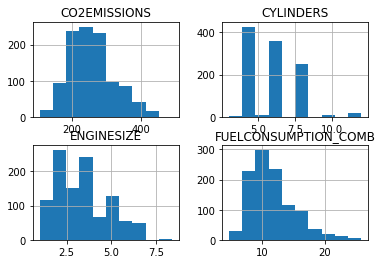

In [6]:
cdf.hist()
plt.show()

A scatter plot for each of these features vs the Emission, to see how linear is their relation:

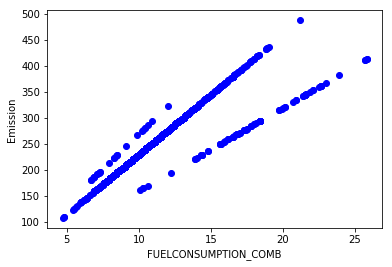

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

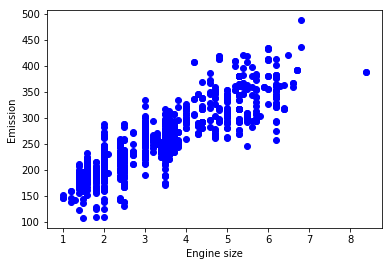

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

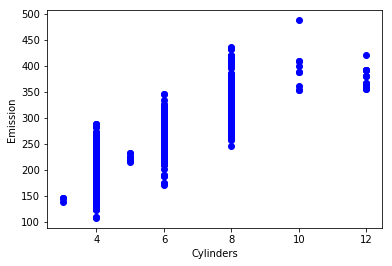

In [9]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

<h4>Training and Test Dataset</h4>
There are two ways to approach this method. First method is to train the entire dataset and then select a small portion of the dataset to test the model. This approach will have high training accuracy and low out of sample accuracy (because the model knows all of the testing data points from the training set. 

<b>Training Accuracy?</b> - It is the percentage of correct predictions that the model makes when using the test dataset. High training accuracy results in an over-fit of the data.

<b>Out of sample accuracy?</b> - It is the percentage of correct predictions that the model makes on data that the model is not been trained on. It is important for the models to have high out of sample accuracy because the purpose of the model is to make correct predictions of the unknown data.

So, in order to obtain high out of sample accuracy our first approach will not help. Hence, we need to look at another approach that is:

<b>Train/Test Split:</b>
In this approach we select a portion of our data for training and the rest dataset is used for testing the model. The model is built on the training set and then the test feature set is passed to the model for prediction and finally, the predicted values of the test set are compared with the actual values of the testing set.

Let's split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. I have created a mask to select random rows using np.random.rand() function: 

In [10]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h4>Train data distribution</h4>

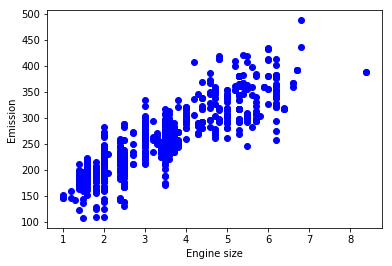

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

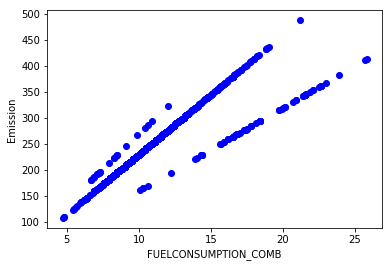

In [12]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

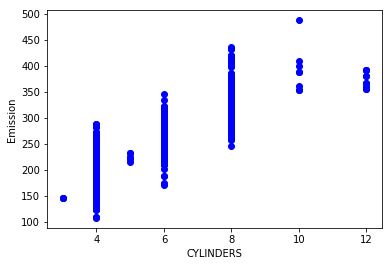

In [13]:
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

<h4>Multiple Regression Model</h4>

Using sklearn package to model data

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[10.80970612  7.54244729  9.52167135]]


As mentioned before, coefficient and intercept, are the parameters of the fit line. 
Given that it is a multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

<b>Ordinary Least Squares (OLS)</b>
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (Y) and the predicted output Y(hat) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

_Solving the model parameters analytically using closed-form equations._

_Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)_

<h4>Prediction</h4>

In [15]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 525.29
Variance score: 0.86


<h4>Evaluation</h4>

In [16]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 16.64
Residual sum of squares (MSE): 525.29
R2-score: 0.83


The result R2-score: 0.83 denotes that the above model shows good prediction. 